In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os

In [2]:
# Load data
path = os.path.join("..", "data", "csvresults", "atari_meta.csv")
df = pd.read_csv(path)
df = df.drop('Unnamed: 0', axis=1).set_index("game")
df = df.drop(["Tennis", "Venture", "MontezumaRevenge"])
df.head()

,reg_loss,reg_mse,reg_mae,reg_val_loss,reg_val_mse,reg_val_mae,hlg_mse,hlg_mae,hlg_loss,hlg_val_mse,hlg_val_mae,hlg_val_loss,y_sd,reg_sd,hlg_sd,kl_mean,kl_sd,hist_sd
game,,,,,,,,,,,,,,,,,,
AirRaid,0.008682,0.008682,0.067155,0.010074,0.010074,0.059409,0.008873,0.068780,3.126328,0.008873,0.068190,3.125896,0.136130,0.00000,0.000000,1.354709,1.336799,0.096615
Alien,0.000827,0.000827,0.008731,0.000716,0.000716,0.008891,0.000843,0.007925,2.243576,0.000709,0.008230,2.240457,0.002764,0.00000,0.000692,0.034985,0.007338,0.040571
Amidar,0.000378,0.000378,0.007455,0.000627,0.000627,0.009036,0.000245,0.004485,2.171497,0.001080,0.012648,2.403203,0.011969,0.01614,0.013054,1.802306,2.315752,0.028396
Assault,0.000014,0.000014,0.000053,0.000021,0.000021,0.000043,0.000014,0.000040,2.125762,0.000021,0.000046,2.124676,0.000000,0.00000,0.000000,0.000075,0.000000,0.024049
Asterix,0.000210,0.000210,0.001097,0.000207,0.000207,0.001159,0.000085,0.000581,2.128017,0.000098,0.000816,2.125485,0.000045,0.00000,0.000057,5.000000,0.000000,0.024059


([<matplotlib.axis.YTick at 0x254e0138490>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15, '0.15'),
  Text(0, 0.2, '0.20')])

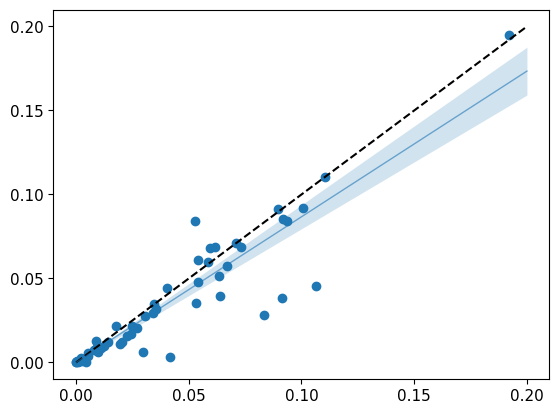

In [176]:
X = df["reg_val_mae"]
Y = df["hlg_val_mae"]
b_hat = np.dot(X.T, Y) / np.dot(X.T, X)
res = Y - b_hat * X
ss_res = np.sum(res ** 2)
p = 0
n = len(X)
alpha = 0.05
t_star = stats.t.ppf(1 - alpha / 2, n - p - 1)
se_b = np.sqrt(ss_res / (np.dot(X.T, X) * (n - p - 1)))
x = np.linspace(0, 0.2, 100)
low = b_hat * x - t_star * se_b * np.abs(x)
high = b_hat * x + t_star * se_b * np.abs(x)

plt.scatter(X, Y)
plt.plot(x, x, color='black', linewidth=1.5, linestyle="dashed")
plt.plot(x, b_hat * x, color="tab:blue", alpha=0.6, linewidth=1)
plt.fill_between(x, low, high, color="tab:blue", alpha=0.2, linewidth=0)
#plt.title("Test MAE by Game", fontsize=16)
plt.tick_params(axis='both', labelsize=11)
#plt.xlabel(r"$\ell_2$", fontsize=14)
#plt.ylabel("HL", fontsize=14, rotation="horizontal")
plt.xticks([0, 0.05, 0.1, 0.15, 0.2])
plt.yticks([0, 0.05, 0.1, 0.15, 0.2])


([<matplotlib.axis.YTick at 0x254e7a2b8d0>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25')])

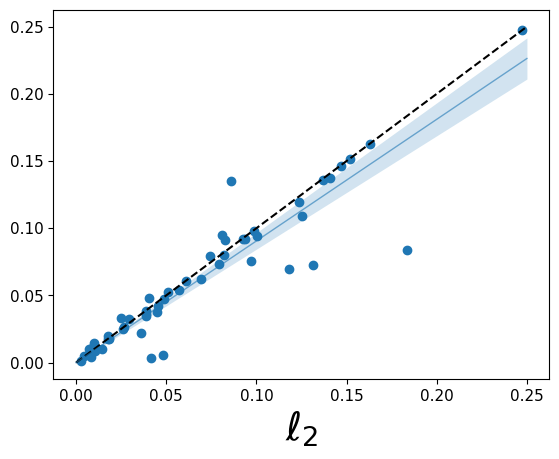

In [199]:
X = np.sqrt(df["reg_val_mse"])
Y = np.sqrt(df["hlg_val_mse"])
b_hat = np.dot(X.T, Y) / np.dot(X.T, X)
res = Y - b_hat * X
ss_res = np.sum(res ** 2)
p = 0
n = len(X)
alpha = 0.05
t_star = stats.t.ppf(1 - alpha / 2, n - p - 1)
se_b = np.sqrt(ss_res / (np.dot(X.T, X) * (n - p - 1)))
x = np.linspace(0, 0.25, 100)
low = b_hat * x - t_star * se_b * np.abs(x)
high = b_hat * x + t_star * se_b * np.abs(x)
plt.scatter(X, Y)
plt.plot(x, x, color='black', linewidth=1.5, linestyle="dashed")
plt.plot(x, b_hat * x, color="tab:blue", alpha=0.6, linewidth=1)
plt.fill_between(x, low, high, color="tab:blue", alpha=0.2, linewidth=0)
plt.xlabel(r"$\ell_2$", fontsize=28)
#plt.title("Test RMSE by Game", fontsize=16)
plt.tick_params(axis='both', labelsize=11)
#plt.ylabel("HL-Gaussian", fontsize=14)
plt.xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
plt.yticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])

Text(0.5, 1.0, 'Atari MAE')

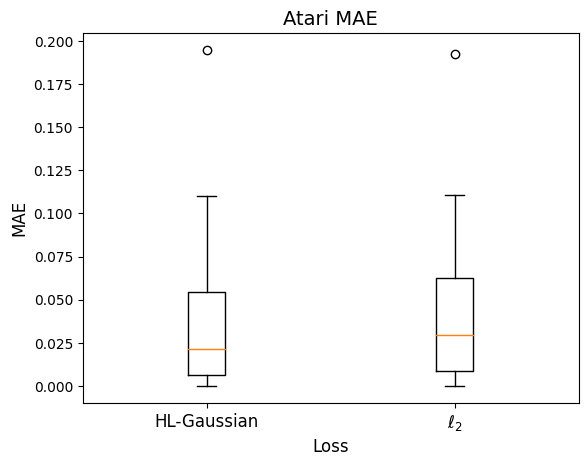

In [200]:
data = df[["hlg_val_mae", "reg_val_mae"]]
plt.boxplot(data, labels=["HL-Gaussian", r"$\ell_2$"])
plt.xlabel("Loss", fontsize=12)
plt.ylabel("MAE", fontsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.title("Atari MAE", fontsize=14)

Text(0.5, 1.0, 'Atari RMSE')

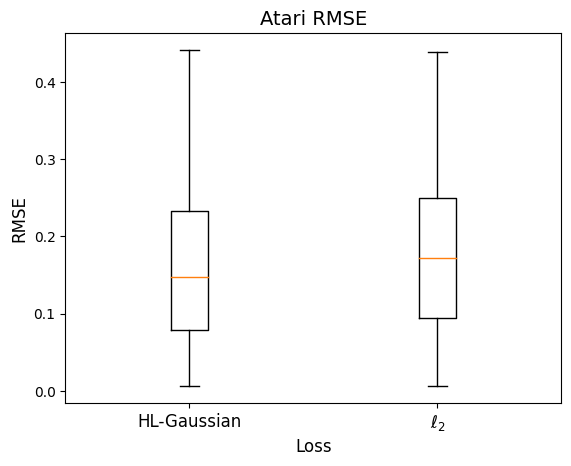

In [201]:
data = np.sqrt(df[["hlg_val_mae", "reg_val_mae"]])
plt.boxplot(data, labels=["HL-Gaussian", r"$\ell_2$"])
plt.xlabel("Loss", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.title("Atari RMSE", fontsize=14)